In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

print(tf.__version__)

2.0.0-rc0


## Train Manually
線形回帰を例に

In [2]:
# sample data
TRUE_W = 5.0
TRUE_b = 6.0
NUM_DATA = 1000

X = tf.random.normal(shape=[NUM_DATA])
noise = tf.random.normal(shape=[NUM_DATA])
Y = TRUE_W * X + TRUE_b + noise

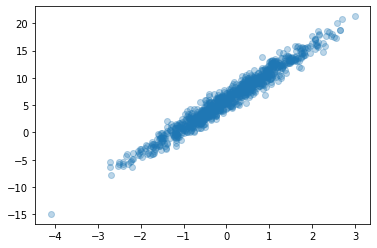

In [3]:
plt.scatter(X, Y, alpha=0.3);

In [4]:
# Define Model
class Model(object):
    def __init__(self):
        self.W = tf.Variable(1.0)
        self.b = tf.Variable(1.0)

    def __call__(self, x):
        return self.W * x + self.b

# Define loss
def loss(predicted_y, true_y):
    return tf.reduce_mean(tf.square(predicted_y - true_y))

In [5]:
# train function
def train_one_epoch(model, inputs, targets, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), targets)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [6]:
model = Model()

for epoch in range(1, 501):
    train_one_epoch(model, X, Y, 0.005)
    current_loss = loss(model(X), Y).numpy()
    if epoch % 20 == 0:
        print("epoch {}: loss={:.4f}".format(epoch, current_loss))

epoch 20: loss=29.0388
epoch 40: loss=19.4445
epoch 60: loss=13.1362
epoch 80: loss=8.9884
epoch 100: loss=6.2610
epoch 120: loss=4.4674
epoch 140: loss=3.2880
epoch 160: loss=2.5123
epoch 180: loss=2.0022
epoch 200: loss=1.6667
epoch 220: loss=1.4460
epoch 240: loss=1.3008
epoch 260: loss=1.2054
epoch 280: loss=1.1425
epoch 300: loss=1.1012
epoch 320: loss=1.0740
epoch 340: loss=1.0561
epoch 360: loss=1.0444
epoch 380: loss=1.0366
epoch 400: loss=1.0315
epoch 420: loss=1.0282
epoch 440: loss=1.0259
epoch 460: loss=1.0245
epoch 480: loss=1.0235
epoch 500: loss=1.0229


In [7]:
print("W: ", model.W.numpy())
print("b: ", model.b.numpy())

W:  4.9373956
b:  5.9936314
